In [63]:
import pandas as pd
import numpy as np

data = pd.read_csv('Housing.csv')
#pd.describe_option()
#Options and setting resource: https://pandas.pydata.org/docs/user_guide/options.html
pd.options.display.max_rows
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [64]:
#Converting catgeorical object columns into categorical:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content)

In [65]:
#Identifying categorey type columns:
data.select_dtypes(include="category").columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [66]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [67]:
labels = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus']

In [68]:
#Convert categorical columns into numbers:

cat_columns = data[labels]

feature_arr = ohe.fit_transform(cat_columns).toarray()

feature_labels = ohe.get_feature_names_out(labels)

features_df = pd.DataFrame(feature_arr, columns = feature_labels)
#featues_df.head()

In [69]:
data_join = data.join(features_df)

pd.set_option('display.max_columns', None)

data_join.head()
#Alt method: data_join.head().T  --to show all columns

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [70]:
#Drop original columns:

data_join.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'], axis=1, inplace=True)
data_join.head()
#data_join.columns

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [71]:
data_join.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [18]:
#data_join.isnull().sum()

In [ ]:
#Fill in 'NaN"/ missing data:

#from sklearn.impute import SimpleImputer
#import numpy as np

#imputer = SimpleImputer(strategy='mean', missing_values=np.NaN)

#x_imputer = imputer.fit_transform(data_join[[' ']])
#data_join[' '] = x_imputer

#### EDA and Feature Scaling Using Regression Models

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [73]:
model = LinearRegression()

scaler = StandardScaler()

In [74]:
X = data_join.drop('price', axis = 1)
y = data_join['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [75]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [76]:
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mse_scaled

7.386791688259138e+35

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [78]:
#Import the SelectKBest class and f_regression function, which are used for feature selection 
#based on an F-test between the features and the target.

In [79]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)
mse_selected = mean_absolute_percentage_error(y_test, y_pred_selected)
mse_selected
print(f'Mean Absolute Percentage Error (with feature selection): {mse_selected:.2f}')


Mean Absolute Percentage Error (with feature selection): 0.19


Mean absolute percentage error (MAPE) is a metric that defines the accuracy of a forecasting method . It represents the average of the absolute percentage errors of each entry in a dataset. A Mean Absolute Percentage Error (MAPE)
score of 20% is considered reliable, although, our model has outcomes as 19% showing a higher ability in the model's ability to accurately forecast predicted against actual values

In [80]:
r2_score(y_test, y_pred_selected)

0.6757702542546213

In [88]:
#y_pred_selected


In [84]:
import numpy as np

In [128]:
df1 = pd.DataFrame ({'Actual': y_test, 'Predicted': y_pred_selected} ) 
pd.options.display.float_format = '{:.0f}'.format
df1.reset_index()


,index,Actual,Predicted
0,482,2940000,3506690
1,314,4095000,3834665
2,383,3570000,5232237
3,487,2870000,4335840
4,43,7700000,6666053
...,...,...,...
104,98,6293000,7398971
105,307,4165000,3849406
106,399,3500000,4613913
107,214,4865000,3508379


In [120]:
import seaborn as sns

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


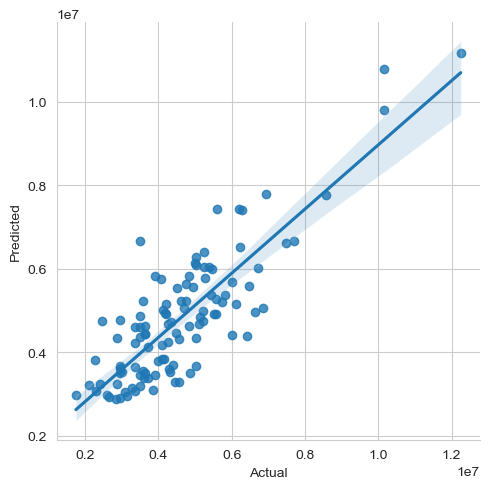

In [145]:
# scatterplot wtih regression line
sns.set_style('whitegrid') 

sns.lmplot(x ='Actual', y ='Predicted', data = df1);


In [155]:
import xgboost as xgb

In [159]:
xgb_model = xgb.XGBRegressor(random_state=42)


In [160]:
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [161]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_scaled)

[21:13:32] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


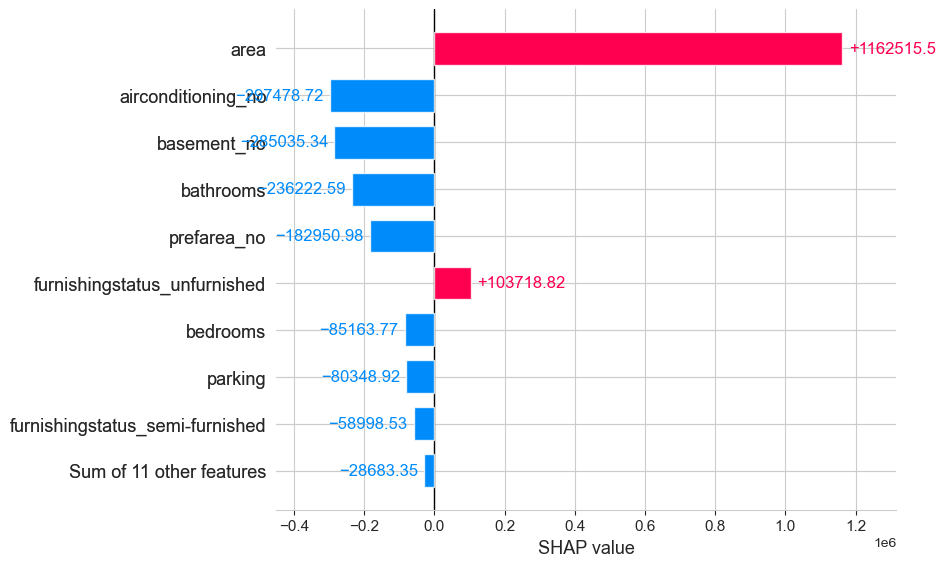

In [173]:
shap.plots.bar(shap_values[0], max_display=10) # default is max_display=12


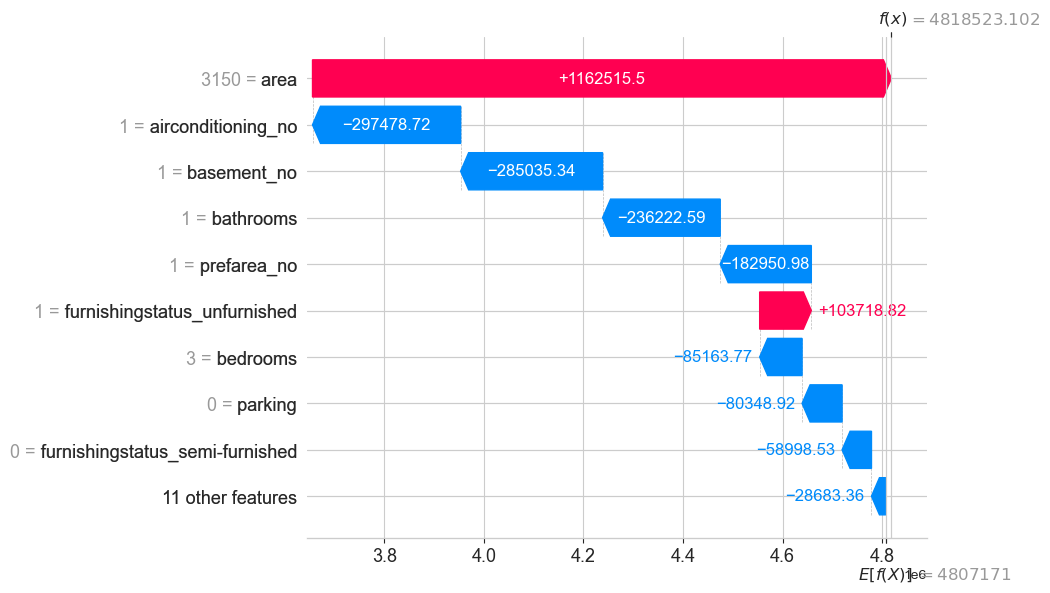

In [169]:
shap.plots.waterfall(shap_values[0]) # For the first observation


[21:17:13] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


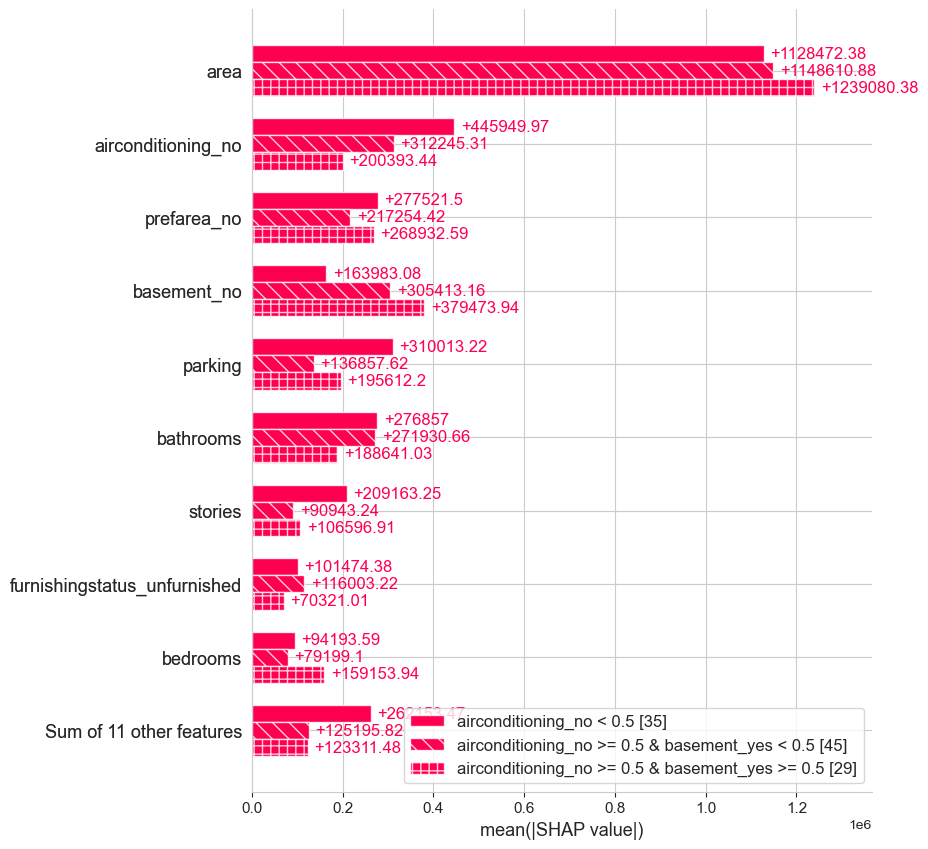

In [165]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values.cohorts(3).abs.mean(0))

Chart does imply that the importance of bathrooms are most importanat when the area of a property is higher/larger. 
While, when the area of a property is smaller, the absence of air conditioning seems to be the highest. 

In [ ]:
#mport matplotlib.pyplot as plt
#f = plt.figure()
shap.summary_plot(rf_shap_values, X_test)
#f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

#Resource: https://medium.com/@shahooda637/all-you-need-to-know-about-shap-for-explainable-ai-8ad35a05e6ec

#https://medium.com/dataman-in-ai/the-shap-with-more-elegant-charts-bc3e73fa1c0c


In [ ]:
#PyCaret

#### Hyper Parameter Tuning using pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, decomposition, datasets

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [21]:
log_reg = LogisticRegression()

In [32]:
pca = decomposition.PCA(n_components=3)

In [23]:
scaler = StandardScaler()

In [24]:
pipe = Pipeline(steps=[('std_scl', scaler),
                       ('pca', pca), ('log_reg', log_reg)])

In [25]:
#define the parameters that we want to optimise for these three objects.

n_components = list(range(1,X.shape[1]+1,1)) #PCA parameters  #Resource: https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html

C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']       #Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV


In [26]:
#creating a dictionary to set all the parameters options for different modules

parameters = dict(pca__n_components = n_components,
                     log_reg__C = C, log_reg__penalty = penalty)

In [28]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS


GridSearchCV(estimator=Pipeline(steps=[('std_scl', StandardScaler()),
                                       ('pca', PCA()),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'log_reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.3257...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'log_reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20]})

In [ ]:
clf_GS.fit(X_train_scaled, y_train)

In [ ]:
clf_GS.